# PROYECTO FINAL MODULO 5: ENTRENAMIENTO DE MODELO DE MACHINE LEARNING PARA DETERMINAR SI UN PACIENTE SUFRE DE ANEMIA

# FUENTE : [Datos abiertos](https://www.datosabiertos.gob.pe/dataset/morbilidad-anemia)

In [2]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 11.3 MB/s eta 0:00:00


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
DATASET_PATH = '/content/drive/MyDrive/Curso Ciencia de datos Python/TRABAJO FINAL MODULO 5/TB_ANEMIA.csv'
df_anemia = pd.read_csv(DATASET_PATH,sep = ";")
df_anemia.head(10)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,40971314,2,A,M,NaN,20230522,D649,D,6203
1,39270343,4,A,M,1128.0,20211122,D509,D,10836
2,39270343,4,A,M,1128.0,20211129,D509,D,10836
3,39155787,3,A,F,1128.0,20210527,D509,D,10836
4,36178995,2,A,F,1299.0,20210215,D509,D,6079
5,38926264,4,A,M,1506.0,20211113,D509,D,7475
6,39141175,1,A,M,1128.0,20210220,D509,D,6856
7,40229751,2,A,M,1278.0,20221120,D509,D,4416
8,39603123,1,A,M,1278.0,20210428,D509,D,4416
9,39105165,1,A,M,1128.0,20210106,D509,D,10836


# EDA

In [5]:
df_anemia.shape

(1327924, 9)

In [6]:
df_anemia.dtypes

,0
id_persona,int64
Edad,int64
Tipo_edad,object
Sexo,object
id_ubigeo,float64
Fecha_atencion,int64
Diagnostico,object
Tipo_Dx,object
id_eess,int64


# TRATAMIENTO DE NULOS

In [7]:
df_anemia.isnull().sum().sum()

10817

In [8]:
df_anemia.isnull().sum()

,0
id_persona,0
Edad,0
Tipo_edad,0
Sexo,0
id_ubigeo,10817
Fecha_atencion,0
Diagnostico,0
Tipo_Dx,0
id_eess,0


In [9]:
df_anemia.dropna(subset=['id_ubigeo'],inplace=True)
df_anemia.shape

(1317107, 9)

# TRATAMIENTO DE DUPLICADOS

In [10]:
df_anemia.duplicated().sum()

19287

In [11]:
df_anemia[df_anemia.duplicated()]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
398,38954543,2,A,F,42.0,20211210,D509,D,5180
400,38954543,2,A,F,42.0,20211110,D509,D,5180
789,39109510,11,M,F,1497.0,20211121,D509,D,243
844,38985611,1,A,F,26.0,20210716,D509,D,5081
884,38942468,1,A,M,42.0,20210627,D509,D,5183
...,...,...,...,...,...,...,...,...,...
1327193,42009830,6,M,M,1453.0,20240507,D509,D,12
1327255,41940907,7,M,M,1000.0,20240613,D509,D,3356
1327409,42037152,6,M,F,1276.0,20240518,D509,D,4404
1327498,42068631,6,M,M,1322.0,20240530,D509,D,5846


In [12]:
df_anemia.drop_duplicates(keep='first',inplace=True)
df_anemia.shape

(1297820, 9)

# ANALIZANDO VARIABLES

## ELIMINAMOS ID_PERSONA

In [13]:
df_anemia.drop(['id_persona'],axis=1,inplace=True)
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
1,4,A,M,1128.0,20211122,D509,D,10836
2,4,A,M,1128.0,20211129,D509,D,10836
3,3,A,F,1128.0,20210527,D509,D,10836
4,2,A,F,1299.0,20210215,D509,D,6079
5,4,A,M,1506.0,20211113,D509,D,7475
6,1,A,M,1128.0,20210220,D509,D,6856
7,2,A,M,1278.0,20221120,D509,D,4416
8,1,A,M,1278.0,20210428,D509,D,4416
9,1,A,M,1128.0,20210106,D509,D,10836
10,1,A,M,1128.0,20210107,D509,D,10836


# CONVERTIMOS DATA DE EDAD A AÑOS

In [14]:
df_anemia.Tipo_edad.value_counts()

,count
Tipo_edad,
A,920953
M,375857
D,1010


In [15]:
df_anemia['edad_total'] = np.where(
    df_anemia['Tipo_edad'] == 'M', df_anemia['Edad'] / 12,
    np.where(df_anemia['Tipo_edad'] == 'D', df_anemia['Edad'] / 365, df_anemia['Edad'])
)
df_anemia[df_anemia['Tipo_edad']=='D'].head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total
368,1,D,M,774.0,20220225,D509,D,2435,0.002740
1814,1,D,F,1288.0,20210227,D509,D,6000,0.002740
1846,1,D,F,1128.0,20210531,D509,D,10836,0.002740
4488,2,D,M,1490.0,20210223,D509,D,169,0.005479
4669,16,D,M,1484.0,20210308,D500,D,146,0.043836
4779,17,D,F,1248.0,20220322,D509,D,4327,0.046575
4837,24,D,F,1866.0,20210423,D509,D,5513,0.065753
4998,8,D,F,1274.0,20220620,D509,D,4432,0.021918
5349,1,D,M,1460.0,20210805,D509,D,16,0.002740
5368,1,D,F,1463.0,20210807,D509,D,30,0.002740


# ANALIZAMOS ID_UBIGEO

In [16]:
df_anemia['id_ubigeo'].value_counts()

,count
id_ubigeo,
1312.0,33487
1283.0,20689
1290.0,13846
1863.0,13049
1323.0,13029
...,...
190.0,1
320.0,1
1890.0,1


In [17]:
PATH_UBIGEOS = 'https://github.com/cesarmayta/datasets/raw/refs/heads/main/TB_UBIGEOS.csv'
df_ubigeos = pd.read_csv(PATH_UBIGEOS,sep=';')
df_ubigeos.head(10)

,id_ubigeo,ubigeo_reniec,ubigeo_inei,departamento_inei,departamento,provincia_inei,provincia,distrito,region,macroregion_inei,macroregion_minsa,iso_3166_2,fips,superficie,altitud,latitud,longitud,Frontera
0,1,10101.0,10101,1,AMAZONAS,101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,154.0,2338.0,-6.2294,-77.8728,NO
1,2,10102.0,10102,1,AMAZONAS,101,CHACHAPOYAS,ASUNCION,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,26.0,2823.0,-6.0325,-77.7108,NO
2,3,10103.0,10103,1,AMAZONAS,101,CHACHAPOYAS,BALSAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,357.0,859.0,-6.8358,-78.0197,NO
3,4,10104.0,10104,1,AMAZONAS,101,CHACHAPOYAS,CHETO,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,57.0,2143.0,-6.2556,-77.7008,NO
4,5,10105.0,10105,1,AMAZONAS,101,CHACHAPOYAS,CHILIQUIN,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,143.0,2677.0,-6.0783,-77.7375,NO
5,6,10106.0,10106,1,AMAZONAS,101,CHACHAPOYAS,CHUQUIBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,279.0,2803.0,-6.9350,-77.8542,NO
6,7,10107.0,10107,1,AMAZONAS,101,CHACHAPOYAS,GRANADA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,181.0,3041.0,-6.1064,-77.6286,NO
7,8,10108.0,10108,1,AMAZONAS,101,CHACHAPOYAS,HUANCAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,49.0,2591.0,-6.1736,-77.8644,NO
8,9,10109.0,10109,1,AMAZONAS,101,CHACHAPOYAS,LA JALCA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,380.0,2869.0,-6.4847,-77.8150,NO
9,10,10110.0,10110,1,AMAZONAS,101,CHACHAPOYAS,LEIMEBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,373.0,2226.0,-6.7075,-77.8039,NO


In [18]:
df_anemia_ubigeo = df_ubigeos[['id_ubigeo','departamento']].copy()
df_anemia_ubigeo.head()

,id_ubigeo,departamento
0,1,AMAZONAS
1,2,AMAZONAS
2,3,AMAZONAS
3,4,AMAZONAS
4,5,AMAZONAS


In [19]:
df_anemia = df_anemia.merge(df_anemia_ubigeo,on='id_ubigeo',how='left')
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,JUNIN
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,JUNIN
3,2,A,F,1299.0,20210215,D509,D,6079,2.0,LIMA
4,4,A,M,1506.0,20211113,D509,D,7475,4.0,MADRE DE DIOS
5,1,A,M,1128.0,20210220,D509,D,6856,1.0,JUNIN
6,2,A,M,1278.0,20221120,D509,D,4416,2.0,LAMBAYEQUE
7,1,A,M,1278.0,20210428,D509,D,4416,1.0,LAMBAYEQUE
8,1,A,M,1128.0,20210106,D509,D,10836,1.0,JUNIN
9,1,A,M,1128.0,20210107,D509,D,10836,1.0,JUNIN


In [20]:
df_anemia['cie10'] = np.where(df_anemia['Diagnostico'].str.startswith(('D50','D53','D64')),1,0)

In [21]:
df_anemia.head(3)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento,cie10
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN,1
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,JUNIN,1
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,JUNIN,1


In [22]:
df_anemia['Fecha_atencion'] = df_anemia['Fecha_atencion'].astype(str)
df_anemia['mes'] = df_anemia['Fecha_atencion'].str[4:6]
df_anemia.head(1)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento,cie10,mes
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN,1,11


In [37]:
df_anemia_processed = df_anemia[['mes','Sexo','departamento','edad_total','cie10']].copy()
df_anemia_processed.rename(columns={'Sexo':'sexo','departamento':'dpto','edad_total':'edad','cie10':'anemia'},inplace=True)
df_anemia_processed.head()

,mes,sexo,dpto,edad,anemia
0,11,M,JUNIN,4.0,1
1,11,M,JUNIN,4.0,1
2,05,F,JUNIN,3.0,1
3,02,F,LIMA,2.0,1
4,11,M,MADRE DE DIOS,4.0,1


# REGRESION LINEAL APLICANDO DATOS CATEGORICOS

## VERIFICAMOS NULOS

In [24]:
df_anemia_processed.isna().sum().sum()

0

## ELIMINAMOS OUTLIERS

In [32]:
def remove_outliers(df,column):
  Q1 = df_anemia_processed[column].quantile(0.25)
  Q3 = df_anemia_processed[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df_anemia_processed[(df_anemia_processed[column] >= lower_bound) & (df_anemia_processed[column] <= upper_bound)]

In [34]:
df_cleaned = remove_outliers(df_anemia_processed, 'edad')
df_cleaned.shape

(1098442, 5)

In [35]:
categorical_columns = df_anemia_processed.select_dtypes(object).columns
categorical_columns

Index(['mes', 'sexo', 'dpto'], dtype='object')

# CREAMOS LISTA POR TIPO DE CODIFICACIÓN ( ORDINAL Y ONE HOT ENCODING)

In [38]:
for cc in categorical_columns:
  print("*"*50)
  print(df_anemia_processed[cc].value_counts())

**************************************************
mes
03    139112
02    126125
04    124814
01    122226
05    117382
06    103615
11    100024
09     98983
10     96891
08     94144
07     89327
12     85177
Name: count, dtype: int64
**************************************************
sexo
M    684186
F    613634
Name: count, dtype: int64
**************************************************
dpto
LIMA             261381
LORETO           135932
PIURA             75907
LAMBAYEQUE        75647
CUSCO             75060
LA LIBERTAD       71621
ANCASH            69953
CAJAMARCA         59662
UCAYALI           57220
JUNIN             44827
AYACUCHO          41822
AREQUIPA          40045
PUNO              34769
SAN MARTIN        33687
HUANCAVELICA      32284
AMAZONAS          32186
ICA               29302
APURIMAC          26869
HUANUCO           26248
CALLAO            20849
PASCO             17204
MADRE DE DIOS     14438
TUMBES            10175
TACNA              6141
MOQUEGUA           4591
N

In [39]:
ordinal_cols = ['sexo']
onehot_cols = list(set(categorical_columns) - set(ordinal_cols))
print(ordinal_cols,onehot_cols)

['sexo'] ['mes', 'dpto']


# CREAMOS UN TRANSFORMER

In [58]:
import sklearn.compose
import sklearn.preprocessing
import pandas as pd

ordinal_cols = ["sexo", "dpto"]
onehot_cols = []

transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(), ordinal_cols),
    remainder="passthrough"
)

# APLICAMOS EL TRANSFOMER A LA VARIABLES CATEGORICAS

In [61]:
data_transformed_df = pd.DataFrame(
    transformer.fit_transform(df_anemia_processed),
    columns=transformer.get_feature_names_out(),
    index=df_anemia_processed.index
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

,sexo,dpto,mes,edad,anemia
0,1.0,11.0,11,4.0,1
1,1.0,11.0,11,4.0,1
2,0.0,11.0,05,3.0,1
3,0.0,14.0,02,2.0,1
4,1.0,16.0,11,4.0,1
...,...,...,...,...,...
1297815,1.0,7.0,05,0.083333,1
1297816,0.0,0.0,06,0.5,1
1297817,1.0,3.0,05,0.083333,1
1297818,1.0,9.0,04,4.0,1


In [63]:
corr_matrix = data_transformed_df.corr()
corr_anemia = corr_matrix['anemia']
corr_anemia.sort_values(ascending=False)

,anemia
anemia,1.000000
sexo,0.001098
mes,-0.003116
dpto,-0.005255
edad,-0.040197


<Axes: >

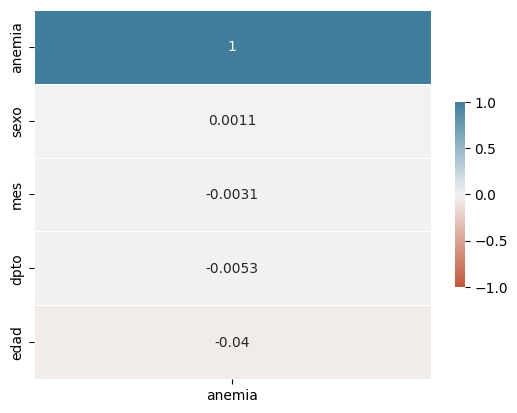

In [64]:
sns.heatmap(
    data=corr_anemia.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

# CREACIÓN DEL MODELO

# DIVIDIMOS DATASET EN TRAIN Y TEST

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')



Accuracy : 1.00


# Aplicando Regresión Logística

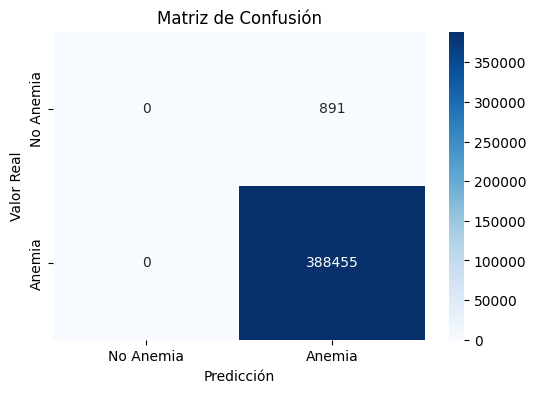

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Anemia', 'Anemia'], yticklabels=['No Anemia', 'Anemia'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


# ENTRENAMIENTO DE MODELO DE REGRESIÓN CON ARBOLES DE DECISIÓN

In [86]:
X = data_transformed_df[['sexo', 'dpto', 'mes', 'edad']]
y = data_transformed_df['anemia']



In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_classifier = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

# evaluación del modelo
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f' MAE : {mae} | R2 : {r2}')


 MAE : 0.004418766583885859 | R2 : 0.002434477264410817


# EVALUAMOS CUAL ES EL MEJOR PARAMETRO DE MAX_DEPTH QUE NO CAIGA EN SOBREAJUSTE

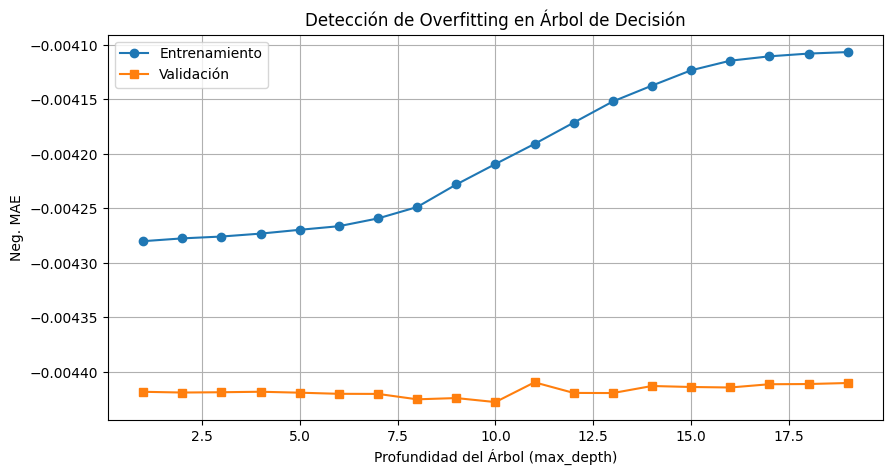

In [90]:
train_scores = []
val_scores = []
max_depths = range(1,20)

for depth in max_depths:
  model = DecisionTreeRegressor(max_depth=depth,random_state=42)
  model.fit(X_train,y_train)

  train_mae = -mean_absolute_error(y_train,model.predict(X_train))
  val_mae = -mean_absolute_error(y_test,model.predict(X_test))

  train_scores.append(train_mae)
  val_scores.append(val_mae)

# Graficamos las curvas de MAE
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Neg. MAE")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()

# RANDOM FOREST

In [91]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.3 MB/s eta 0:00:00


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

param_space = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(3, 20),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'max_features': Categorical(['sqrt', 'log2'])
}

rf = RandomForestRegressor(random_state=42)

bayes_search = BayesSearchCV(
    estimator=rf, search_spaces=param_space,
    n_iter=10, cv=3, scoring='r2', n_jobs=-1, verbose=2, random_state=42
)

bayes_search.fit(X_train, y_train)

print("Mejores parámetros:", bayes_search.best_params_)
print("Mejor puntuación:", bayes_search.best_score_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


KeyboardInterrupt: 

<ipython-input-95-1543a912242b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance,


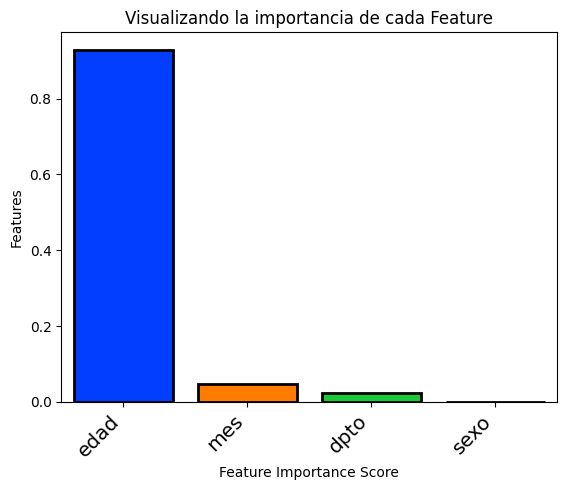

In [95]:
features = ['sexo', 'dpto', 'mes', 'edad']
feature_importances_df = pd.DataFrame({
    "feature": features,
    "importance": tree_classifier.feature_importances_
}).sort_values("importance", ascending=False)

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance,
            palette='bright', saturation=2.0, edgecolor='black', linewidth=2)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()
